In [1]:
%pylab inline
from pyndamics3 import Simulation

Populating the interactive namespace from numpy and matplotlib
pyndamics3  version  0.0.12


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/29728a7d4bebe8197dca7d873d81b9dce954522e">

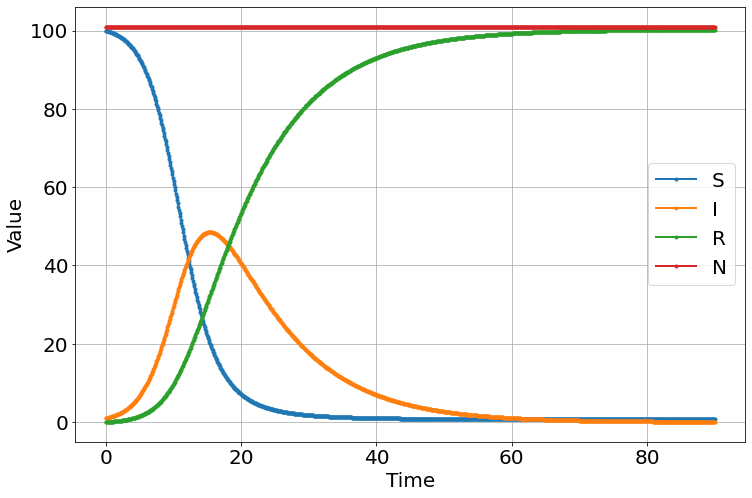

<Figure size 864x576 with 0 Axes>

In [2]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.params(β=.5,γ=.1)
sim.run(90)

In [3]:
t_data=[10,20,30,40,50]
I_data=[30,45,18,8,2]

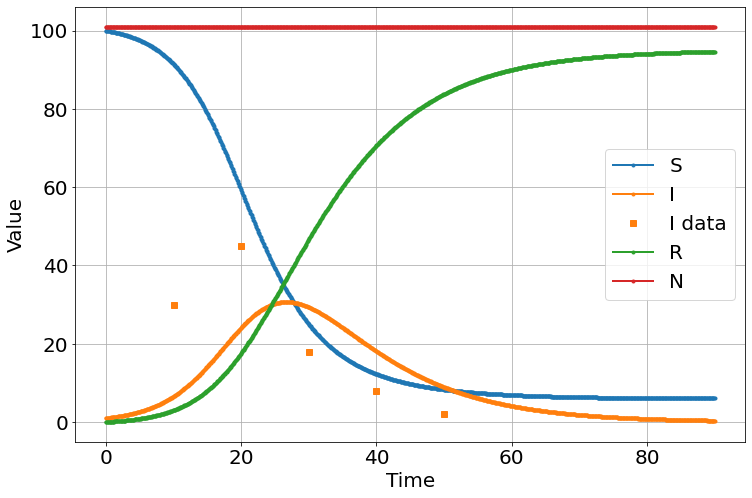

<Figure size 864x576 with 0 Axes>

In [4]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.add_data(t=t_data,I=I_data,plot=1)
sim.params(β=.3,γ=.1)
sim.run(90)

In [5]:
from pyndamics3.mcmc import *

In [17]:
model=MCMCModel(sim,
               β=Uniform(0,2),
               γ=Uniform(0,2),)

Sampling Prior...
Done.
0.39 s
Running MCMC 1/4...
Done.
1 m, 29.75 s
Running MCMC 2/4...
Done.
1 m, 46.44 s
Running MCMC 3/4...
Done.
1 m, 55.32 s
Running MCMC 4/4...
Done.
1 m, 57.81 s


<Figure size 864x576 with 0 Axes>

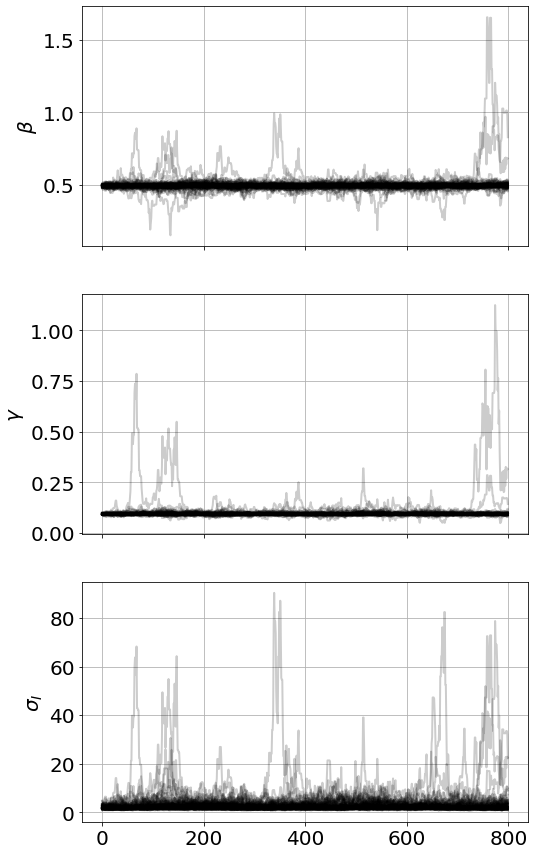

In [18]:
model.run_mcmc(800,repeat=4)
model.plot_chains()

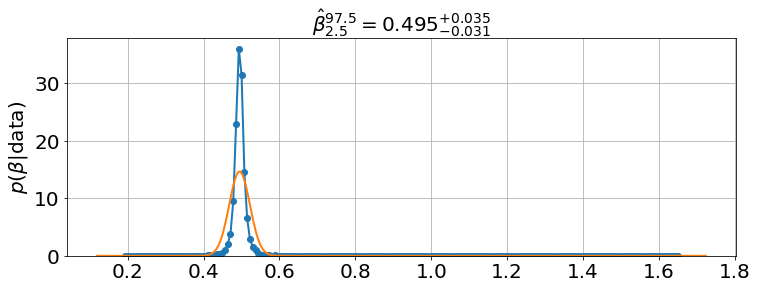

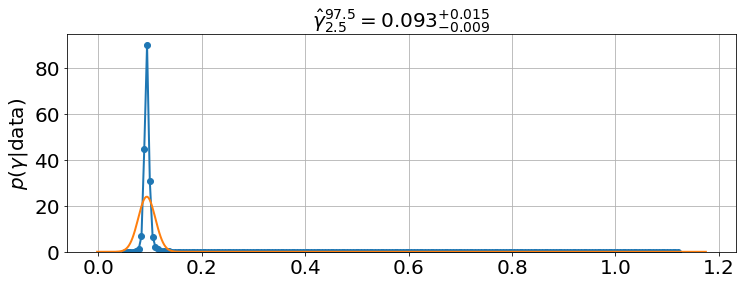

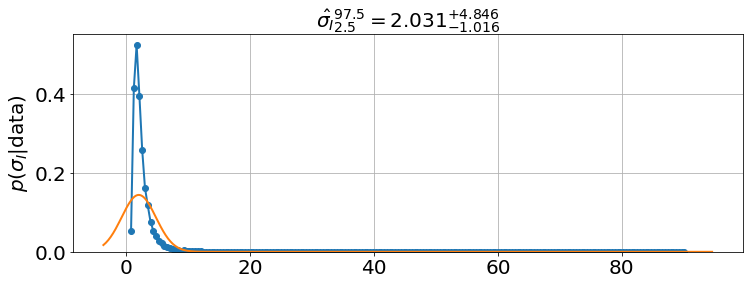

In [19]:
model.plot_distributions()

In [20]:
best_estimates=model.best_estimates()
best_estimates

{'β': array([0.48362688, 0.49485825, 0.5063108 ]),
 'γ': array([0.08960343, 0.09347326, 0.09801114]),
 '_sigma_I': array([1.36552538, 2.03100032, 3.47133768])}

In [21]:
best_estimates['β'][1]  # median

0.4948582476563234

In [22]:
best_estimates['β'][0]  # 2.5% level

0.4836268804089593